In [6]:
# Importing the basic libraries we will require for the project

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importing the Machine Learning models we require from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# Importing the other functions we may require from Scikit-Learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

# To get diferent metric scores
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,precision_recall_curve,roc_curve,make_scorer

# Code to ignore warnings from function usage
import warnings;
import numpy as np
warnings.filterwarnings('ignore')

In [7]:
travel_data = pd.read_csv("Traveldata_train.csv")
travel_data

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0
...,...,...,...,...,...,...,...,...,...
94374,98894375,Male,Loyal Customer,32.0,Business Travel,Business,1357,83.0,125.0
94375,98894376,Male,Loyal Customer,44.0,Business Travel,Business,592,5.0,11.0
94376,98894377,Male,NaN,63.0,Business Travel,Business,2794,0.0,0.0
94377,98894378,Male,Loyal Customer,16.0,Personal Travel,Eco,2744,0.0,0.0


In [8]:
Survey_data = pd.read_csv("Surveydata_train.csv")
Survey_data

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94374,98894375,0,Poor,Ordinary,Good,Good,Convenient,Poor,Poor,Poor,Poor,Good,Good,Good,Needs Improvement,Good,Poor
94375,98894376,1,Good,Ordinary,Good,Good,Convenient,Needs Improvement,Excellent,Excellent,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Good
94376,98894377,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Acceptable,Good,Acceptable
94377,98894378,0,Needs Improvement,Ordinary,NaN,Needs Improvement,Convenient,Good,Needs Improvement,Good,Good,Acceptable,Good,Good,Good,Excellent,Good


In [9]:
travel_train_data = pd.merge(travel_data, Survey_data, on='ID', how='inner')
travel_train_data

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0,0,...,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,0,...,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0,1,...,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0,0,...,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0,1,...,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94374,98894375,Male,Loyal Customer,32.0,Business Travel,Business,1357,83.0,125.0,0,...,Poor,Poor,Poor,Poor,Good,Good,Good,Needs Improvement,Good,Poor
94375,98894376,Male,Loyal Customer,44.0,Business Travel,Business,592,5.0,11.0,1,...,Needs Improvement,Excellent,Excellent,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Good
94376,98894377,Male,NaN,63.0,Business Travel,Business,2794,0.0,0.0,1,...,Good,Excellent,Good,Good,Good,Good,Good,Acceptable,Good,Acceptable
94377,98894378,Male,Loyal Customer,16.0,Personal Travel,Eco,2744,0.0,0.0,0,...,Good,Needs Improvement,Good,Good,Acceptable,Good,Good,Good,Excellent,Good


In [10]:
travel_data_test = pd.read_csv("Traveldata_test.csv")
travel_data_test

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,99900001,Female,NaN,36.0,Business Travel,Business,532,0.0,0.0
1,99900002,Female,Disloyal Customer,21.0,Business Travel,Business,1425,9.0,28.0
2,99900003,Male,Loyal Customer,60.0,Business Travel,Business,2832,0.0,0.0
3,99900004,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0
4,99900005,Male,Disloyal Customer,18.0,Business Travel,Business,1610,17.0,0.0
...,...,...,...,...,...,...,...,...,...
35597,99935598,Male,Loyal Customer,8.0,Personal Travel,Eco,1334,0.0,0.0
35598,99935599,Female,Loyal Customer,53.0,Business Travel,Business,1772,0.0,0.0
35599,99935600,Male,Disloyal Customer,22.0,Business Travel,Eco,1180,0.0,0.0
35600,99935601,Female,Loyal Customer,67.0,Personal Travel,Eco,420,23.0,16.0


In [11]:
Survey_data_test = pd.read_csv("Surveydata_test.csv")
Survey_data_test

,ID,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,99900001,Acceptable,Green Car,Acceptable,Acceptable,Manageable,Needs Improvement,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Poor
1,99900002,Extremely Poor,Ordinary,Good,Poor,Manageable,Acceptable,Poor,Acceptable,Acceptable,Excellent,Acceptable,Good,Acceptable,Excellent,Acceptable
2,99900003,Excellent,Ordinary,Excellent,Excellent,Very Convenient,Excellent,Excellent,Excellent,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Needs Improvement,Excellent
3,99900004,Acceptable,Green Car,Excellent,Acceptable,Very Convenient,Poor,Acceptable,Excellent,Poor,Acceptable,Needs Improvement,Excellent,Excellent,Excellent,Poor
4,99900005,Excellent,Ordinary,Extremely Poor,Excellent,Needs Improvement,Excellent,Excellent,Excellent,Excellent,NaN,Acceptable,Excellent,Excellent,Excellent,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35597,99935598,Needs Improvement,Green Car,Excellent,Needs Improvement,Manageable,Acceptable,Needs Improvement,Acceptable,Acceptable,Good,Excellent,Good,Acceptable,Good,Acceptable
35598,99935599,Needs Improvement,Ordinary,Needs Improvement,Good,Needs Improvement,Acceptable,Excellent,Excellent,Good,Good,Good,Good,Acceptable,Good,Good
35599,99935600,Good,Green Car,Extremely Poor,Good,Needs Improvement,Needs Improvement,Good,Poor,Needs Improvement,Poor,Acceptable,Poor,Poor,Excellent,Needs Improvement
35600,99935601,Excellent,Ordinary,Excellent,Excellent,Inconvenient,Acceptable,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Acceptable,Excellent,Good


In [12]:
travel_test_data = pd.merge(travel_data_test, Survey_data_test, on='ID', how='inner')
travel_test_data

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,99900001,Female,NaN,36.0,Business Travel,Business,532,0.0,0.0,Acceptable,...,Needs Improvement,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Poor
1,99900002,Female,Disloyal Customer,21.0,Business Travel,Business,1425,9.0,28.0,Extremely Poor,...,Acceptable,Poor,Acceptable,Acceptable,Excellent,Acceptable,Good,Acceptable,Excellent,Acceptable
2,99900003,Male,Loyal Customer,60.0,Business Travel,Business,2832,0.0,0.0,Excellent,...,Excellent,Excellent,Excellent,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Needs Improvement,Excellent
3,99900004,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0,Acceptable,...,Poor,Acceptable,Excellent,Poor,Acceptable,Needs Improvement,Excellent,Excellent,Excellent,Poor
4,99900005,Male,Disloyal Customer,18.0,Business Travel,Business,1610,17.0,0.0,Excellent,...,Excellent,Excellent,Excellent,Excellent,NaN,Acceptable,Excellent,Excellent,Excellent,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35597,99935598,Male,Loyal Customer,8.0,Personal Travel,Eco,1334,0.0,0.0,Needs Improvement,...,Acceptable,Needs Improvement,Acceptable,Acceptable,Good,Excellent,Good,Acceptable,Good,Acceptable
35598,99935599,Female,Loyal Customer,53.0,Business Travel,Business,1772,0.0,0.0,Needs Improvement,...,Acceptable,Excellent,Excellent,Good,Good,Good,Good,Acceptable,Good,Good
35599,99935600,Male,Disloyal Customer,22.0,Business Travel,Eco,1180,0.0,0.0,Good,...,Needs Improvement,Good,Poor,Needs Improvement,Poor,Acceptable,Poor,Poor,Excellent,Needs Improvement
35600,99935601,Female,Loyal Customer,67.0,Personal Travel,Eco,420,23.0,16.0,Excellent,...,Acceptable,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Acceptable,Excellent,Good


In [13]:
travel_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
 9   Overall_Experience       94379 non-null  int64  
 10  Seat_Comfort             94318 non-null  object 
 11  Seat_Class               94379 non-null  object 
 12  Arrival_Time_Convenient  85449 non-null  object 
 13  Catering                 85638 non-null  object 
 14  Platform_Location     

In [14]:
travel_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       35602 non-null  int64  
 1   Gender                   35572 non-null  object 
 2   Customer_Type            32219 non-null  object 
 3   Age                      35591 non-null  float64
 4   Type_Travel              32154 non-null  object 
 5   Travel_Class             35602 non-null  object 
 6   Travel_Distance          35602 non-null  int64  
 7   Departure_Delay_in_Mins  35573 non-null  float64
 8   Arrival_Delay_in_Mins    35479 non-null  float64
 9   Seat_Comfort             35580 non-null  object 
 10  Seat_Class               35602 non-null  object 
 11  Arrival_Time_Convenient  32277 non-null  object 
 12  Catering                 32245 non-null  object 
 13  Platform_Location        35590 non-null  object 
 14  Onboard_Wifi_Service  

In [16]:
pd.DataFrame(data={'% of Missing Values':round(travel_train_data.isna().sum()/travel_train_data.isna().count()*100,2)}).sort_values(by='% of Missing Values',ascending=False)

,% of Missing Values
Type_Travel,9.78
Customer_Type,9.48
Arrival_Time_Convenient,9.46
Catering,9.26
Onboard_Service,8.05
Arrival_Delay_in_Mins,0.38
Baggage_Handling,0.15
Legroom,0.10
Online_Support,0.10
CheckIn_Service,0.08


In [17]:
pd.DataFrame(data={'% of Missing Values':round(travel_test_data.isna().sum()/travel_test_data.isna().count()*100,2)}).sort_values(by='% of Missing Values',ascending=False)

,% of Missing Values
Type_Travel,9.68
Customer_Type,9.50
Catering,9.43
Arrival_Time_Convenient,9.34
Onboard_Service,8.07
Arrival_Delay_in_Mins,0.35
Baggage_Handling,0.11
Departure_Delay_in_Mins,0.08
Gender,0.08
Legroom,0.07


In [89]:
travel_train_data1 = travel_train_data.drop(["ID"], axis = 1)
travel_train_data1 = travel_train_data1.drop(["Travel_Distance"], axis = 1)

In [90]:
travel_test_data1 = travel_test_data.drop(["ID"], axis = 1)
travel_test_data1 = travel_test_data1.drop(["Travel_Distance"], axis = 1)

In [91]:
travel_train_data1.nunique()

Gender                       2
Customer_Type                2
Age                         75
Type_Travel                  2
Travel_Class                 2
Departure_Delay_in_Mins    437
Arrival_Delay_in_Mins      434
Overall_Experience           2
Seat_Comfort                 6
Seat_Class                   2
Arrival_Time_Convenient      6
Catering                     6
Platform_Location            6
Onboard_Wifi_Service         6
Onboard_Entertainment        6
Online_Support               6
Ease_of_Online_Booking       6
Onboard_Service              6
Legroom                      6
Baggage_Handling             5
CheckIn_Service              6
Cleanliness                  6
Online_Boarding              6
dtype: int64

In [92]:
travel_test_data1.nunique()

Gender                       2
Customer_Type                2
Age                         75
Type_Travel                  2
Travel_Class                 2
Departure_Delay_in_Mins    350
Arrival_Delay_in_Mins      355
Seat_Comfort                 6
Seat_Class                   2
Arrival_Time_Convenient      6
Catering                     6
Platform_Location            5
Onboard_Wifi_Service         6
Onboard_Entertainment        6
Online_Support               5
Ease_of_Online_Booking       6
Onboard_Service              5
Legroom                      6
Baggage_Handling             5
CheckIn_Service              5
Cleanliness                  5
Online_Boarding              6
dtype: int64

In [93]:
travel_train_data1.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,94346.0,39.419647,15.116632,7.0,27.0,40.0,51.0,85.0
Departure_Delay_in_Mins,94322.0,14.647092,38.138781,0.0,0.0,0.0,12.0,1592.0
Arrival_Delay_in_Mins,94022.0,15.005222,38.439409,0.0,0.0,0.0,13.0,1584.0
Overall_Experience,94379.0,0.546658,0.497821,0.0,0.0,1.0,1.0,1.0


In [94]:
numeric_data = travel_train_data1.select_dtypes(include=['float64', 'int64'])

# Calculate quartiles and IQR
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

# Find lower and upper bounds for outliers
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

In [95]:
(
    (travel_train_data1.select_dtypes(include=["float64", "int64"]) < lower)
    | (travel_train_data1.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(travel_train_data1) * 100

Age                         0.000000
Departure_Delay_in_Mins    13.907755
Arrival_Delay_in_Mins      13.392810
Overall_Experience          0.000000
dtype: float64

In [229]:

travel_train_data1['overall_mins'] = travel_train_data1['Arrival_Delay_in_Mins'] + travel_train_data1['Departure_Delay_in_Mins']
travel_train_data1 = travel_train_data1.drop(["Arrival_Delay_in_Mins", "Departure_Delay_in_Mins" ], axis=1)

travel_test_data1['overall_mins'] = travel_test_data1['Arrival_Delay_in_Mins'] + travel_test_data1['Departure_Delay_in_Mins']
travel_test_data1 = travel_test_data1.drop(["Arrival_Delay_in_Mins", "Departure_Delay_in_Mins" ], axis=1)


travel_train_data1.isna().sum()

Gender                       77
Customer_Type              8951
Age                          33
Type_Travel                9226
Travel_Class                  0
Overall_Experience            0
Seat_Comfort                 61
Seat_Class                    0
Arrival_Time_Convenient    8930
Catering                   8741
Platform_Location            30
Onboard_Wifi_Service         30
Onboard_Entertainment        18
Online_Support               91
Ease_of_Online_Booking       73
Onboard_Service            7601
Legroom                      90
Baggage_Handling            142
CheckIn_Service              77
Cleanliness                   6
Online_Boarding               6
overall_mins                357
dtype: int64

In [231]:
X_train = travel_train_data1.drop(["Overall_Experience"], axis=1)
y_train = travel_train_data1["Overall_Experience"]

In [232]:
# Splitting the data
X_test = travel_test_data1


In [233]:
reqd_col_for_impute = ["Online_Boarding", "Cleanliness", "CheckIn_Service", "Baggage_Handling", "Ease_of_Online_Booking", 
                       "Customer_Type", "Age", "Type_Travel", "Catering", "Platform_Location", "Onboard_Wifi_Service", "Online_Support", 
                       "Onboard_Service", "Gender", "Seat_Comfort", "overall_mins", "Arrival_Time_Convenient", 
                       "Onboard_Entertainment", "Legroom" ]

# Simple Imputer with Mode
imputer = SimpleImputer(strategy="most_frequent")

# Fit and transform the train data
X_train[reqd_col_for_impute] = imputer.fit_transform(X_train[reqd_col_for_impute])

# Transform the test data
X_test[reqd_col_for_impute] = imputer.transform(X_test[reqd_col_for_impute])

In [234]:
print(X_train.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Gender                     0
Customer_Type              0
Age                        0
Type_Travel                0
Travel_Class               0
Seat_Comfort               0
Seat_Class                 0
Arrival_Time_Convenient    0
Catering                   0
Platform_Location          0
Onboard_Wifi_Service       0
Onboard_Entertainment      0
Online_Support             0
Ease_of_Online_Booking     0
Onboard_Service            0
Legroom                    0
Baggage_Handling           0
CheckIn_Service            0
Cleanliness                0
Online_Boarding            0
overall_mins               0
dtype: int64
------------------------------
Gender                     0
Customer_Type              0
Age                        0
Type_Travel                0
Travel_Class               0
Seat_Comfort               0
Seat_Class                 0
Arrival_Time_Convenient    0
Catering                   0
Platform_Location          0
Onboard_Wifi_Service       0
Onboard_Entertainment      0

In [238]:
for column in ['Age', 'overall_mins']:
    X_train[column]=X_train[column].astype('float')
    X_test[column]=X_test[column].astype('float')

In [239]:
cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

Gender
Female    47892
Male      46487
Name: count, dtype: int64
******************************
Customer_Type
Loyal Customer       78774
Disloyal Customer    15605
Name: count, dtype: int64
******************************
Type_Travel
Business Travel    67843
Personal Travel    26536
Name: count, dtype: int64
******************************
Travel_Class
Eco         49342
Business    45037
Name: count, dtype: int64
******************************
Seat_Comfort
Acceptable           21219
Needs Improvement    20946
Good                 20595
Poor                 15185
Excellent            12971
Extremely Poor        3463
Name: count, dtype: int64
******************************
Seat_Class
Green Car    47435
Ordinary     46944
Name: count, dtype: int64
******************************
Arrival_Time_Convenient
Good                 28504
Excellent            17684
Acceptable           15177
Needs Improvement    14990
Poor                 13692
Extremely Poor        4332
Name: count, dtype: int64
****

In [240]:
cols = X_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

Gender
Female    47892
Male      46487
Name: count, dtype: int64
******************************
Customer_Type
Loyal Customer       78774
Disloyal Customer    15605
Name: count, dtype: int64
******************************
Type_Travel
Business Travel    67843
Personal Travel    26536
Name: count, dtype: int64
******************************
Travel_Class
Eco         49342
Business    45037
Name: count, dtype: int64
******************************
Seat_Comfort
Acceptable           21219
Needs Improvement    20946
Good                 20595
Poor                 15185
Excellent            12971
Extremely Poor        3463
Name: count, dtype: int64
******************************
Seat_Class
Green Car    47435
Ordinary     46944
Name: count, dtype: int64
******************************
Arrival_Time_Convenient
Good                 28504
Excellent            17684
Acceptable           15177
Needs Improvement    14990
Poor                 13692
Extremely Poor        4332
Name: count, dtype: int64
****

In [241]:
X_train1 = pd.get_dummies(X_train, drop_first=True)
X_test1 = pd.get_dummies(X_test, drop_first=True)

X_train1.drop(['CheckIn_Service_Extremely Poor', 'Cleanliness_Extremely Poor', 'Onboard_Service_Extremely Poor', 
               'Online_Support_Extremely Poor', 'Platform_Location_Very Inconvenient'], axis=1, inplace=True)

X_train1.drop(['Ease_of_Online_Booking_Extremely Poor', 'Online_Boarding_Extremely Poor', 'Onboard_Wifi_Service_Extremely Poor', 
               'Legroom_Extremely Poor', 'Catering_Poor', 'Arrival_Time_Convenient_Extremely Poor', 'Cleanliness_Poor', 
               'Cleanliness_Needs Improvement', 'Onboard_Wifi_Service_Needs Improvement', 'Baggage_Handling_Poor'], axis=1, inplace=True)

X_test1.drop(['Ease_of_Online_Booking_Extremely Poor', 'Online_Boarding_Extremely Poor', 'Onboard_Wifi_Service_Extremely Poor', 
               'Legroom_Extremely Poor', 'Catering_Poor', 'Arrival_Time_Convenient_Extremely Poor', 'Cleanliness_Poor', 
               'Cleanliness_Needs Improvement', 'Onboard_Wifi_Service_Needs Improvement', 'Baggage_Handling_Poor'], axis=1, inplace=True)


print(X_train1.shape, X_test1.shape)



(94379, 61) (35602, 61)


In [242]:
X_train1.head()

,Age,overall_mins,Gender_Male,Customer_Type_Loyal Customer,Type_Travel_Personal Travel,Travel_Class_Eco,Seat_Comfort_Excellent,Seat_Comfort_Extremely Poor,Seat_Comfort_Good,Seat_Comfort_Needs Improvement,...,CheckIn_Service_Excellent,CheckIn_Service_Good,CheckIn_Service_Needs Improvement,CheckIn_Service_Poor,Cleanliness_Excellent,Cleanliness_Good,Online_Boarding_Excellent,Online_Boarding_Good,Online_Boarding_Needs Improvement,Online_Boarding_Poor
0,52.0,5.0,False,True,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,False,True
1,48.0,9.0,True,True,True,True,False,False,False,False,...,False,False,True,False,False,True,False,True,False,False
2,43.0,196.0,False,True,False,False,False,False,False,True,...,False,True,False,False,True,False,True,False,False,False
3,44.0,31.0,False,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,50.0,0.0,False,True,False,False,False,False,False,False,...,False,True,False,False,False,True,False,True,False,False


In [243]:
X_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 61 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        94379 non-null  float64
 1   overall_mins                               94379 non-null  float64
 2   Gender_Male                                94379 non-null  bool   
 3   Customer_Type_Loyal Customer               94379 non-null  bool   
 4   Type_Travel_Personal Travel                94379 non-null  bool   
 5   Travel_Class_Eco                           94379 non-null  bool   
 6   Seat_Comfort_Excellent                     94379 non-null  bool   
 7   Seat_Comfort_Extremely Poor                94379 non-null  bool   
 8   Seat_Comfort_Good                          94379 non-null  bool   
 9   Seat_Comfort_Needs Improvement             94379 non-null  bool   
 10  Seat_Comfort_Poor     

*Model Building*

In [244]:
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Attrite', 'Attrite'], yticklabels=['Not Attrite', 'Attrite'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [245]:
model_dt= DecisionTreeClassifier(random_state=1,max_depth=8)
model_dt.fit(X_train1, y_train)

DecisionTreeClassifier(max_depth=8, random_state=1)

In [246]:
predictions1 = model_dt.predict(X_test1)

# Save the predictions to a new CSV file
submission_df1 = pd.DataFrame({'ID': travel_test_data['ID'], 'Overall_Experience': predictions1 })
submission_df1.to_csv('submission_dt.csv', index=False)

              precision    recall  f1-score   support

           0       0.89      0.91      0.90     42786
           1       0.92      0.90      0.91     51593

    accuracy                           0.90     94379
   macro avg       0.90      0.90      0.90     94379
weighted avg       0.90      0.90      0.90     94379



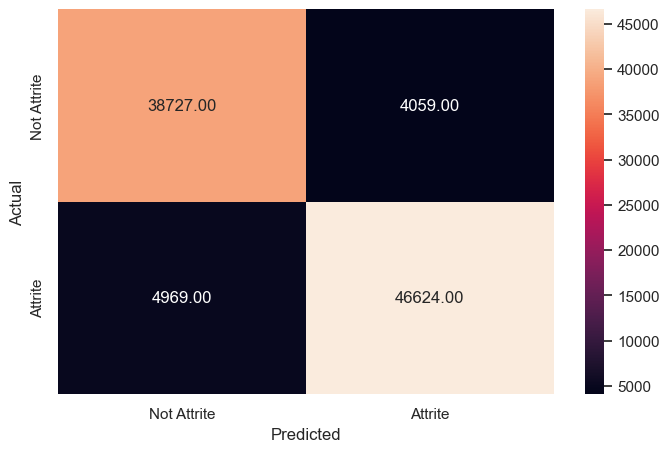

In [247]:
pred_train_dt = model_dt.predict(X_train1)

metrics_score(y_train, pred_train_dt)

In [252]:
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(1,100,10),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}
# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, cv=5,scoring='recall',n_jobs=-1)
grid_obj = grid_obj.fit(X_train1, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train1, y_train)

DecisionTreeClassifier(max_depth=11, max_leaf_nodes=250, min_samples_split=30,
                       random_state=1)

              precision    recall  f1-score   support

           0       0.92      0.93      0.93     42786
           1       0.94      0.94      0.94     51593

    accuracy                           0.93     94379
   macro avg       0.93      0.93      0.93     94379
weighted avg       0.93      0.93      0.93     94379



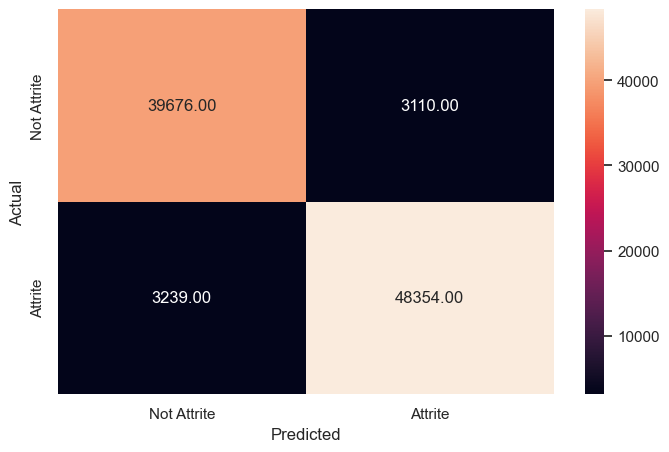

In [253]:
y_pred_train_rf = estimator.predict(X_train1)

metrics_score(y_train, y_pred_train_rf)

In [254]:
predictions1 = estimator.predict(X_test1)

# Save the predictions to a new CSV file
submission_df1 = pd.DataFrame({'ID': travel_test_data['ID'], 'Overall_Experience': predictions1 })
submission_df1.to_csv('submission_dt_hp.csv', index=False)

In [255]:
rf_estimator = RandomForestClassifier(random_state = 1)

rf_estimator.fit(X_train1, y_train)

RandomForestClassifier(random_state=1)

In [256]:
predictions2 = rf_estimator.predict(X_test1)

# Save the predictions to a new CSV file
submission_df2 = pd.DataFrame({'ID': travel_test_data['ID'], 'Overall_Experience': predictions2 })
submission_df2.to_csv('submission_dt_ht.csv', index=False)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42786
           1       1.00      1.00      1.00     51593

    accuracy                           1.00     94379
   macro avg       1.00      1.00      1.00     94379
weighted avg       1.00      1.00      1.00     94379



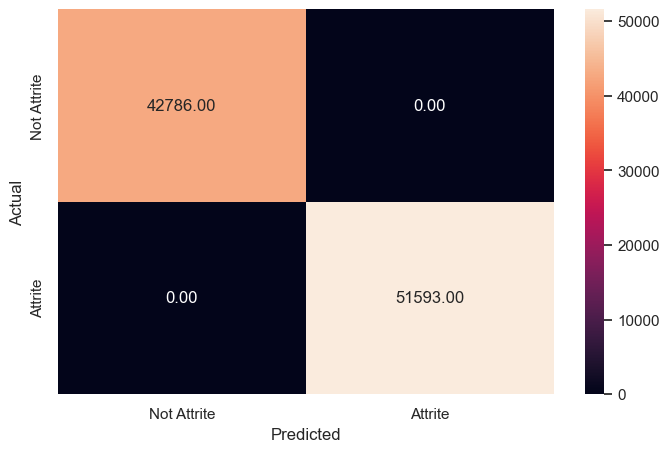

In [257]:
y_pred_train_rf = rf_estimator.predict(X_train1)

metrics_score(y_train, y_pred_train_rf)

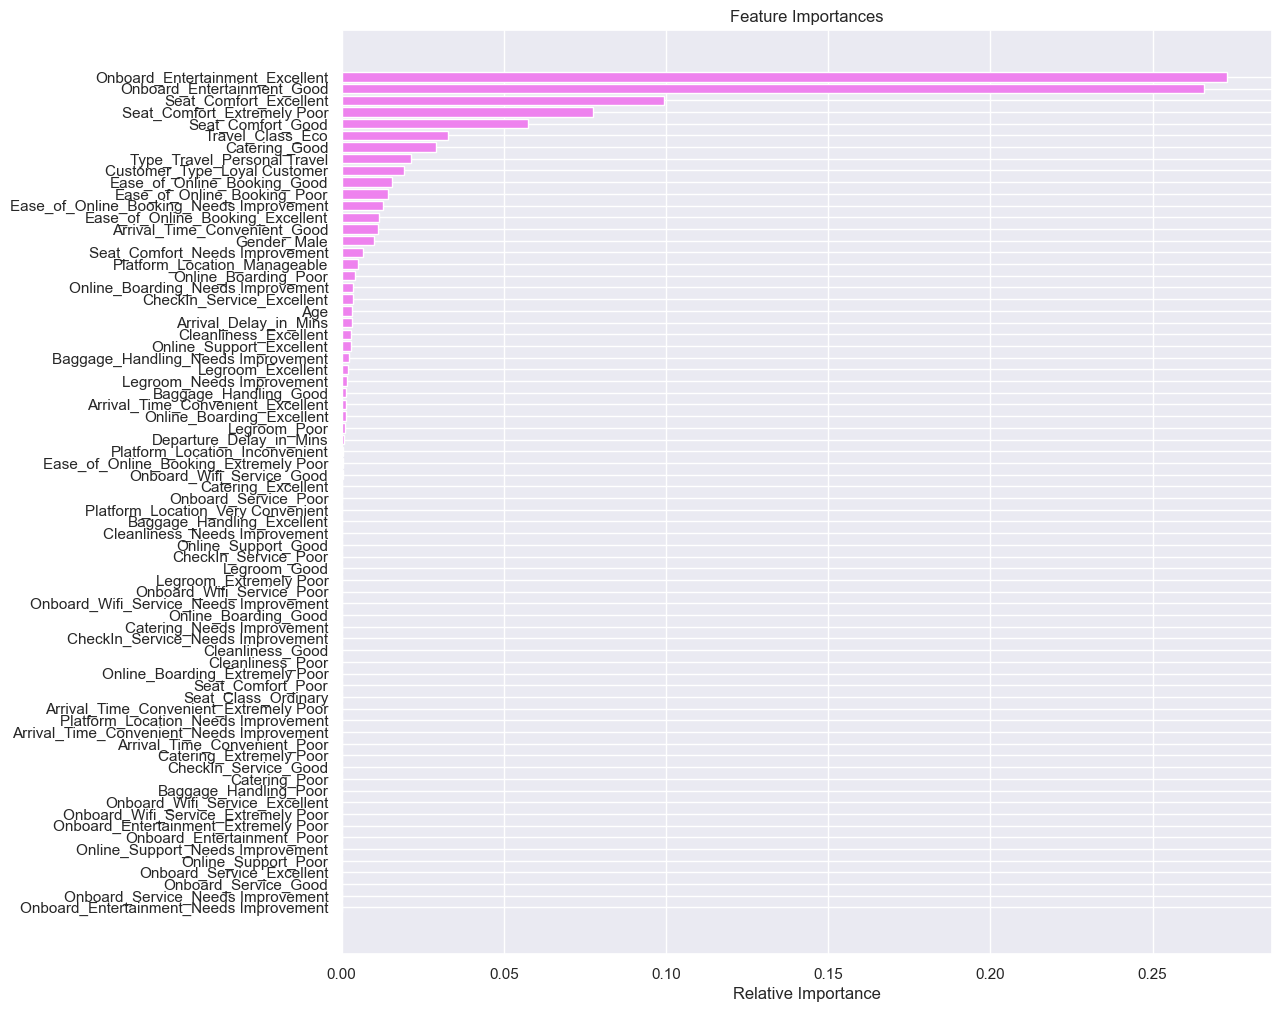

In [138]:
##DecisionTree
feature_names = list(X_train1.columns)
importances = model_dt.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()



<Axes: xlabel='Importance', ylabel='None'>

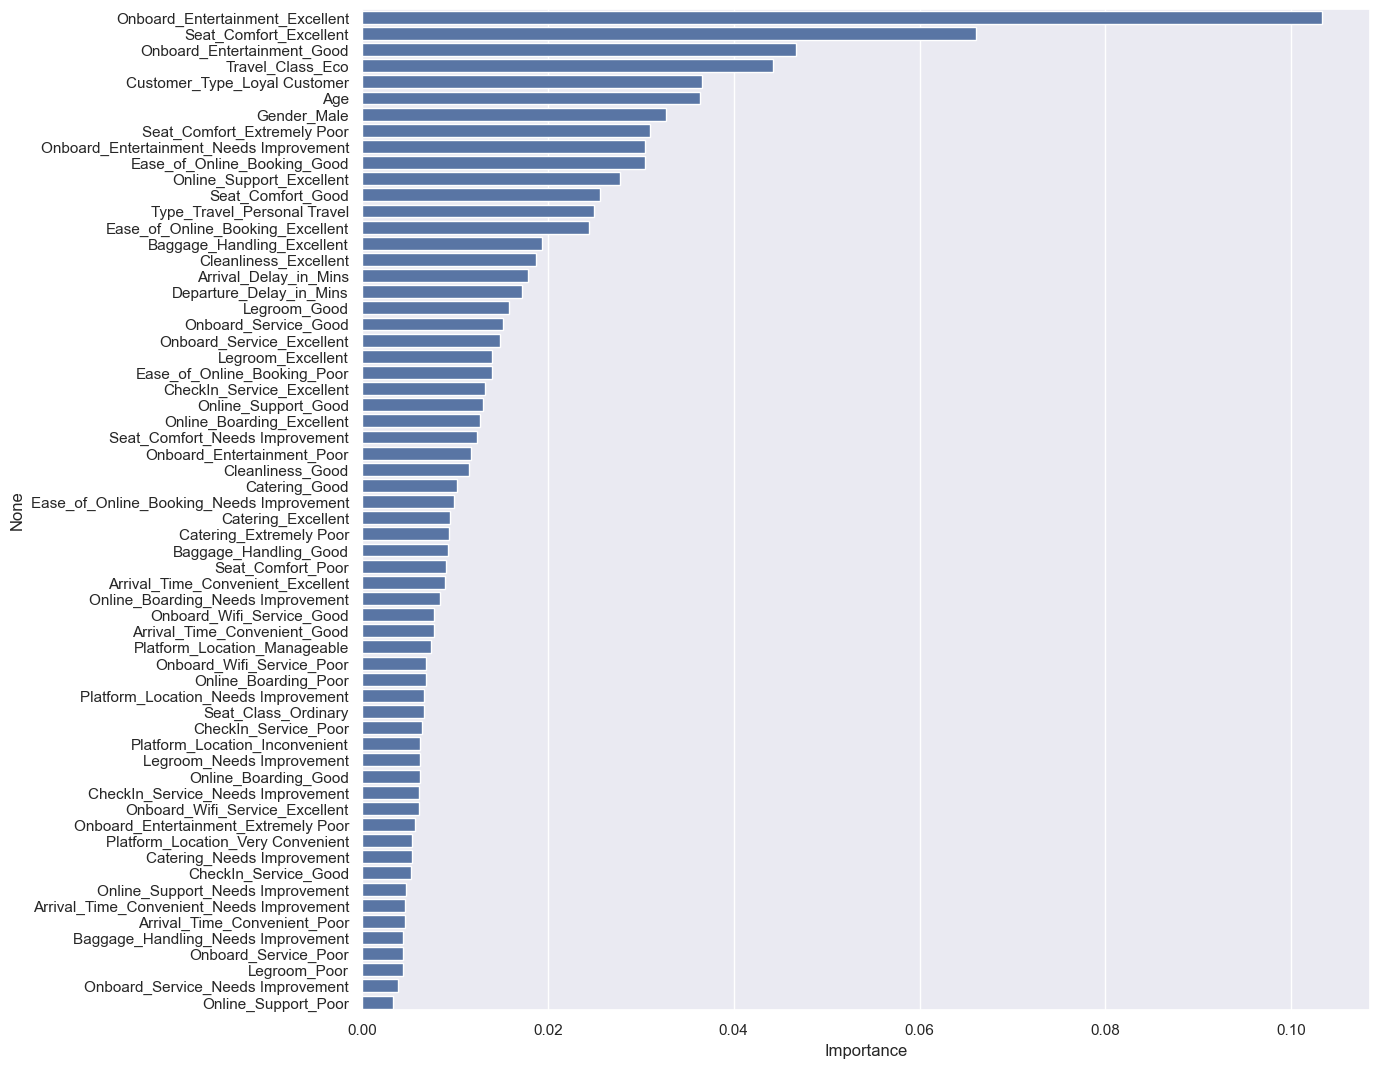

In [192]:
#random_forest
importances = rf_estimator.feature_importances_

columns = X_train1.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x = importance_df.Importance, y = importance_df.index)

In [193]:
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,precision_recall_curve,roc_curve,make_scorer

# Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score
from sklearn import tree


In [258]:
#hyper parameter tuning
rf_estimator_tuned = RandomForestClassifier(class_weight = {0: 0.17, 1: 0.83}, random_state = 1)

# Grid of parameters to choose from
params_rf = {  
        "n_estimators": [100, 250, 400],
        "min_samples_leaf": np.arange(1, 4, 1),
        "max_features": [0.7, 0.9, 'auto'],
}


# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5)


In [259]:

grid_obj = grid_obj.fit(X_train1, y_train)



KeyboardInterrupt: 

In [ ]:
# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [ ]:


grid_obj = grid_obj.fit(X_train1, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [ ]:
predictions_rf = grid_obj.predict(X_test1)

# Create a submission dataframe with ids and predictions
submission_df = pd.DataFrame({'ID': travel_test_data['ID'] , 'Overall_Experience': predictions_rf})

# Save the submission dataframe to a csv file
submission_df.to_csv('submission_rf_hpt.csv', index=False)



In [209]:
X_test1.to_csv('X_test1.csv', index=False)


In [217]:
X_train1.to_csv('X_train1.csv', index=False)

In [170]:
X_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 66 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        35602 non-null  float64
 1   Departure_Delay_in_Mins                    35602 non-null  float64
 2   Arrival_Delay_in_Mins                      35602 non-null  float64
 3   Gender_Male                                35602 non-null  bool   
 4   Customer_Type_Loyal Customer               35602 non-null  bool   
 5   Type_Travel_Personal Travel                35602 non-null  bool   
 6   Travel_Class_Eco                           35602 non-null  bool   
 7   Seat_Comfort_Excellent                     35602 non-null  bool   
 8   Seat_Comfort_Extremely Poor                35602 non-null  bool   
 9   Seat_Comfort_Good                          35602 non-null  bool   
 10  Seat_Comfort_Needs Imp

In [199]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense


In [200]:
scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train1)
test_df = scaler.transform(X_test1)


In [201]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train1.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [202]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train1, y_train, epochs=10, batch_size=128, validation_split=0.2)


Epoch 1/10
590/590 [==============================] - 4s 4ms/step - loss: 0.2224 - accuracy: 0.9052 - val_loss: 0.1659 - val_accuracy: 0.9314
Epoch 2/10
590/590 [==============================] - 2s 3ms/step - loss: 0.1478 - accuracy: 0.9365 - val_loss: 0.1444 - val_accuracy: 0.9403
Epoch 3/10
590/590 [==============================] - 2s 3ms/step - loss: 0.1310 - accuracy: 0.9431 - val_loss: 0.1329 - val_accuracy: 0.9442
Epoch 4/10
590/590 [==============================] - 2s 3ms/step - loss: 0.1213 - accuracy: 0.9470 - val_loss: 0.1329 - val_accuracy: 0.9436
Epoch 5/10
590/590 [==============================] - 2s 4ms/step - loss: 0.1147 - accuracy: 0.9498 - val_loss: 0.1265 - val_accuracy: 0.9468
Epoch 6/10
590/590 [==============================] - 2s 3ms/step - loss: 0.1099 - accuracy: 0.9510 - val_loss: 0.1256 - val_accuracy: 0.9472
Epoch 7/10
590/590 [==============================] - 2s 3ms/step - loss: 0.1055 - accuracy: 0.9535 - val_loss: 0.1254 - val_accuracy: 0.9463
Epoch 

In [204]:
predictions_nn = model.predict(test_df)

predictions_nn = (predictions_nn > 0.5).astype('int32')

# Create a submission dataframe with ids and predictions
submission_df = pd.DataFrame({'ID': travel_test_data['ID'] , 'Overall_Experience': predictions.flatten()})

# Save the submission dataframe to a csv file
submission_df.to_csv('submission_nn.csv', index=False)



1113/1113 [==============================] - 2s 1ms/step


In [117]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix





In [195]:
gbm_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm_model.fit(X_train1, y_train)

GradientBoostingClassifier(random_state=42)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91     42786
           1       0.93      0.92      0.93     51593

    accuracy                           0.92     94379
   macro avg       0.92      0.92      0.92     94379
weighted avg       0.92      0.92      0.92     94379



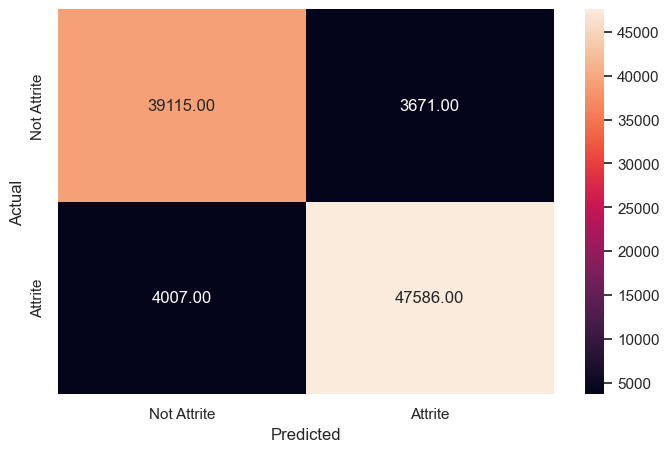

In [196]:
y_pred_train_gbm = gbm_model.predict(X_train1)

metrics_score(y_train, y_pred_train_gbm)

In [119]:
predictions_nn = gbm_model.predict(test_df)


# Create a submission dataframe with ids and predictions
submission_df = pd.DataFrame({'ID': travel_test_data['ID'] , 'Overall_Experience': predictions.flatten()})

# Save the submission dataframe to a csv file
submission_df.to_csv('submission_gb.csv', index=False)


In [221]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

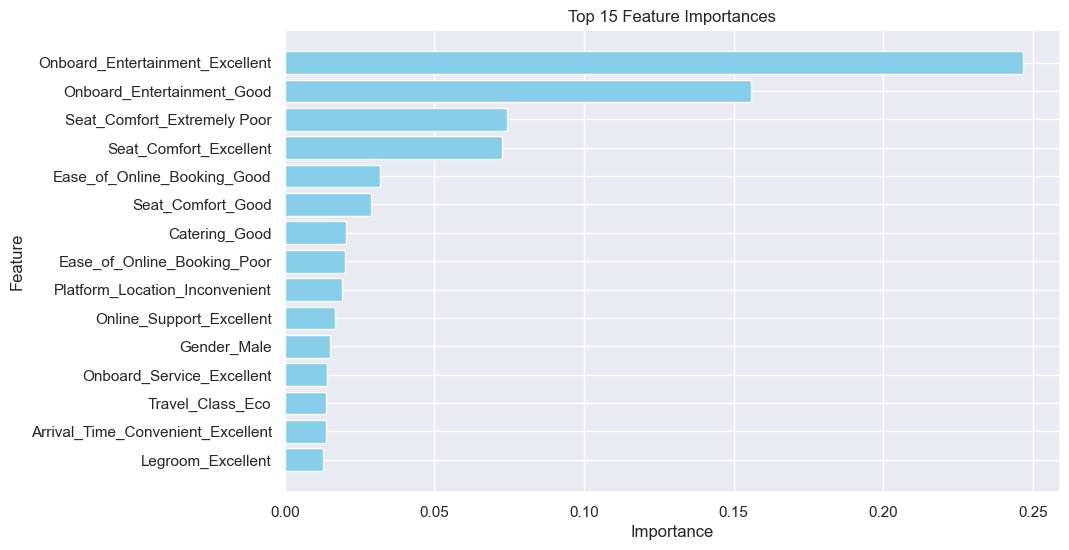

Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}


In [248]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train1, y_train)

# Step 3: Validate the Model

# Step 4: Feature Importance Analysis
feature_importance = pd.DataFrame({
    'Feature': X_train1.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot the top 15 features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'][:15][::-1], feature_importance['Importance'][:15][::-1], color='skyblue')
plt.title('Top 15 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Step 5: Hyperparameter Tuning (Optional)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
}
grid_search = GridSearchCV(xgb_model, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train1, y_train)
print(f"Best Parameters: {grid_search.best_params_}")

# Retrain the model with the best parameters


In [249]:
best_xgb_model = grid_search.best_estimator_
best_xgb_model.fit(X_train1, y_train)

# Step 6: Predict on Test Data
y_test_pred = best_xgb_model.predict(X_test1)
submission_df = pd.DataFrame({'ID': travel_test_data['ID'] , 'Overall_Experience': y_test_pred})

# Save the submission dataframe to a csv file
submission_df.to_csv('submission_gb.csv', index=False)

In [225]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train1, y_train)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train1)
X_test_scaled = scaler.transform(X_test1)

# Step 4: Hyperparameter Tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(xgb_model, param_grid, cv=3, scoring='accuracy', verbose=1)
grid_search.fit(X_train1, y_train)
print(f"Best Parameters: {grid_search.best_params_}")

# Retrain the model with the best parameters
best_xgb_model = grid_search.best_estimator_
best_xgb_model.fit(X_train_scaled, y_train)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [226]:


# Step 5: Predict on Test Data
y_test_pred1 = best_xgb_model.predict(X_test_scaled)
submission_df = pd.DataFrame({'ID': travel_test_data['ID'] , 'Overall_Experience': y_test_pred1})

# Save the submission dataframe to a csv file
submission_df.to_csv('submission_gb_im.csv', index=False)


In [250]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
catboost_model = CatBoostClassifier(
    iterations=1000,          # Increase for better results
    learning_rate=0.05,       # Reduce if overfitting
    depth=6,                  # Tuning parameter
    loss_function='Logloss',
    random_seed=42,
    verbose=100,
    eval_metric='Accuracy'
)

catboost_model.fit(
    X_train1, y_train,
    use_best_model=True,
    early_stopping_rounds=50
)

# Validate the model

# Step 3: Predict on Test Data
y_test_pred = catboost_model.predict(X_test1)

You should provide test set for use best model. use_best_model parameter has been switched to false value.


0:	learn: 0.8561015	total: 294ms	remaining: 4m 53s
100:	learn: 0.9342650	total: 4.68s	remaining: 41.6s
200:	learn: 0.9452738	total: 8.95s	remaining: 35.6s
300:	learn: 0.9508577	total: 12.7s	remaining: 29.4s
400:	learn: 0.9539516	total: 16.6s	remaining: 24.8s
500:	learn: 0.9560601	total: 20.5s	remaining: 20.4s
600:	learn: 0.9580733	total: 23.9s	remaining: 15.8s
700:	learn: 0.9596414	total: 27.2s	remaining: 11.6s
800:	learn: 0.9611354	total: 30.6s	remaining: 7.61s
900:	learn: 0.9624705	total: 34.1s	remaining: 3.74s
999:	learn: 0.9634559	total: 37.6s	remaining: 0us


In [251]:
y_test_pred_cat = catboost_model.predict(X_test1)
submission_df = pd.DataFrame({'ID': travel_test_data['ID'] , 'Overall_Experience': y_test_pred_cat})

# Save the submission dataframe to a csv file
submission_df.to_csv('submission_cat.csv', index=False)